In [23]:
import pandas as pd
import pymysql
import mysql.connector
import sqlalchemy
from matplotlib import pyplot as plt

### Conectando ao BD

In [5]:
password = 'ovatsugselirama1032'

database = 'notes'
user = 'root'
host='localhost'

con = pymysql.connect(host=host, user=user, passwd=password, db=database, charset='utf8mb4')
cur = con.cursor()
cur.execute('SELECT * FROM disciplina')
con.autocommit(True)

In [7]:
disciplina = pd.read_sql("SELECT * FROM disciplina", con)
nota = pd.read_sql("SELECT * FROM nota", con)

df = pd.merge(nota, disciplina, left_on='disciplina', right_on='id_disciplina', how='left').drop('id_disciplina', axis=1)

### Aqui eu junto as duas tabelas em uma, para futuramente fazer a análise.

In [15]:
df = pd.merge(nota, disciplina, left_on='disciplina', right_on='id_disciplina', how='left').drop(['id_disciplina', 'disciplina'], axis=1)

df

,id_nota,titulo,texto,ultima_modificacao,data_criacao,nome,periodo
0,1,Matemática,"A matemática (dos termos gregos μάθημα, transl...",2019-09-19 03:16:16,2021-04-01 05:17:08,Algebra Linear,1
1,2,Equação linear,Diz-se em matemática que uma equação polinomia...,2021-03-10 05:15:12,2021-07-30 03:00:37,Algebra Linear,1
2,3,Equação algébrica,"Em matemática, equações algébricas são equaçõe...",2019-01-20 14:50:25,2019-10-11 17:00:22,Algebra Linear,1
3,4,Equação diferencial,"Em matemática, uma equação diferencial é uma e...",2020-02-22 23:58:08,2021-10-23 05:17:29,Algebra Linear,1
4,5,Vetor (matemática),"Em geometria analítica, um vetor é uma classe ...",2020-05-23 02:56:00,2021-01-23 00:18:44,Algebra Linear,1
...,...,...,...,...,...,...,...
1249,1250,Roraima,Coordenadas: 2° 03' N 61° 24' O Roraima (pronú...,2018-12-25 04:02:54,2020-05-17 09:58:53,Língua castelhana,0
1250,1251,Estados Unidos,Estados Unidos da América (EUA; em inglês: Uni...,2019-10-31 08:34:01,2020-04-23 16:07:10,Língua castelhana,0
1251,1252,Belize,"Coordenadas: 17° 15' N, 88° 45' W Belize (pron...",2020-07-31 21:44:33,2021-02-01 00:09:01,Língua castelhana,0
1252,1253,Gibraltar,Coordenadas: 36° 7' N 5° 21' O Gibraltar (pron...,2020-03-09 01:17:21,2020-03-14 15:56:35,Língua castelhana,0


## Questão: Qual matéria teve a maior quantidade de anotações? E qual obteve a menor quantidade?

### Nessa análise, procurarei buscar a quantidade de anotações que cada matéria obteve, a fim de compreender a necessidade de anotações em cada uma delas. É uma razão interessante, pois alguns conteúdos normalmente precisam de mais anotações devido ao volume de informações que possuem, o que implica em mais anotações de alunos. Já em outros, isso acontece de forma menor pois podem ter um conteúdo mais compacto ou mais simples de memorizar.

In [21]:
qntd_materias = df.nome.value_counts()
al = qntd_materias['Algebra Linear']
bio = qntd_materias['Biologia']
geo = qntd_materias['Geografia']
ing = qntd_materias['Língua Inglesa']
filo = qntd_materias['Filosofia']
quim = qntd_materias['Química']
cast = qntd_materias['Língua castelhana']

print('A quantidade de anotações na matéria de Algebra Linear é ', al)
print('A quantidade de anotações na matéria de Biologia é ', bio)
print('A quantidade de anotações na matéria de Geografia é ', geo)
print('A quantidade de anotações na matéria de Lingua Inglesa é ', ing)
print('A quantidade de anotações na matéria de Filosofia é ', filo)
print('A quantidade de anotações na matéria de Química é ', quim)
print('A quantidade de anotações na matéria de Lingua Castelhana é ', cast)

A quantidade de anotações na matéria de Algebra Linear é  132
A quantidade de anotações na matéria de Biologia é  210
A quantidade de anotações na matéria de Geografia é  84
A quantidade de anotações na matéria de Lingua Inglesa é  204
A quantidade de anotações na matéria de Filosofia é  216
A quantidade de anotações na matéria de Química é  156
A quantidade de anotações na matéria de Lingua Castelhana é  252


Aqui ja foi possível ver que a matéria de Lingua Castelhana teve mais anotações, enquanto 

<BarContainer object of 7 artists>

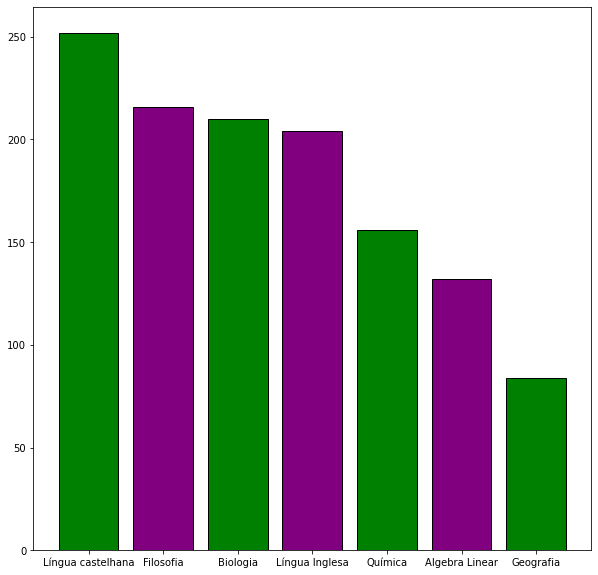

In [29]:
plt.rcParams['figure.figsize'] = (10,10)

plt.bar(x=qntd_materias.index.values, height=qntd_materias.values,
        color=['green', 'purple'], edgecolor='black')